In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
!apt-get install python3.11
!ln -sf /usr/bin/python3.11 /usr/bin/python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.11 is already the newest version (3.11.7-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
!pip install -U ydata-profiling

In [ ]:
!pip install pytorch-forecasting

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
path = "/content/drive/MyDrive/Colab Notebooks/Wolt/"

In [42]:
df_Daily_Activity = pd.read_csv(path + "daily_cp_activity_dataset.csv")
df_Daily_Activity.head(10)

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.00
1,2021-05-02,927,19.88,0.55,0.00
2,2021-05-03,40,16.88,0.60,0.00
3,2021-05-04,51,21.88,0.53,0.00
4,2021-05-05,50,21.11,0.54,0.00
5,2021-05-06,47,19.04,0.56,0.00
6,2021-05-07,49,25.61,0.50,0.00
7,2021-05-08,48,20.04,0.55,0.00
8,2021-05-09,42,13.49,0.67,2.88
9,2021-05-10,48,17.59,0.58,0.00


In [10]:
df_Daily_Activity.shape

(761, 5)

In [11]:
df_Daily_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     761 non-null    object 
 1   courier_partners_online  761 non-null    int64  
 2   temperature              731 non-null    float64
 3   relative_humidity        761 non-null    float64
 4   precipitation            756 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.9+ KB


# Change date format from text to date

In [12]:
df_Daily_Activity['date'] = pd.to_datetime(df_Daily_Activity['date'])
df_Daily_Activity['weekday'] = df_Daily_Activity['date'].dt.dayofweek

In [13]:
df_Daily_Activity.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,weekday
0,2021-05-01,49,18.27,0.57,0.0,5
1,2021-05-02,927,19.88,0.55,0.0,6
2,2021-05-03,40,16.88,0.60,0.0,0
3,2021-05-04,51,21.88,0.53,0.0,1
4,2021-05-05,50,21.11,0.54,0.0,2


In [14]:
# Check Null Values

df_Daily_Activity.isnull().sum()

date                        0
courier_partners_online     0
temperature                30
relative_humidity           0
precipitation               5
weekday                     0
dtype: int64

In [15]:
# Sort the DataFrame by date to ensure the correct order
df_Daily_Activity.sort_values(by='date', inplace=True)
df_Daily_Activity.reset_index(drop=True, inplace=True)

In [16]:
#Fill missing values
df_Daily_Activity['temperature'] = round((df_Daily_Activity['temperature'].ffill() + df_Daily_Activity['temperature'].bfill())/2, 2)

In [17]:
# Fill Missing Values
df_Daily_Activity['precipitation'].fillna(df_Daily_Activity['precipitation'].mode()[0], inplace=True)

In [18]:
df_Daily_Activity['month'] = df_Daily_Activity['date'].dt.month

In [19]:
# this didn't help


# df_Daily_Activity['day_bin'] = pd.to_datetime(df_Daily_Activity['date']).apply(
#     lambda x: (1 if 1 <= x.day <= 5
#                 else 2 if 6 <= x.day <= 10
#                 else 3 if 11 <= x.day <= 15
#                 else 4 if 16 <= x.day <= 20
#                 else 5 if 21 <= x.day <= 25
#                 else 6
#               ) )

In [20]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_Daily_Activity)
profile

Output hidden; open in https://colab.research.google.com to view.

In [21]:
from scipy import stats

def normality_test(data):
    alpha = 0.05
    statistic, p_value = stats.shapiro(data)
    alpha = 0.05  # significance level
    if p_value > alpha:
        return True
    return False

In [22]:
def detect_Outlier(df, col):
    if normality_test(df[col].tolist()):
        UperBound = df[col].mean()+(3 * df[col].std())
        LowerBound = df[col].mean()-(3 * df[col].std())
        print(f"Lower Bound is {LowerBound} and Uper Bound is {UperBound}")
        print(f"{col.ljust(20)} has a Normal Distribution With {len(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])} Outlier")
        print(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])
        df[col][(df[col]<LowerBound) | (df[col]>UperBound)] = df[col].mode()[0]
    else:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        IQR = q3 - q1
        UperBound = q3 + (1.5 * IQR)
        LowerBound = q1 - (1.5 * IQR)
        print(f"Lower Bound is {LowerBound} and Uper Bound is {UperBound}")
        print(f"{col.ljust(20)} has NOT a Normal Distribution With {len(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])} Outlier")
        print(df[col][(df[col]<LowerBound) | (df[col]>UperBound)])
        df[col][(df[col]<LowerBound) | (df[col]>UperBound)] = df[col].mode()[0]

In [ ]:
chk = ['courier_partners_online', 'temperature', 'relative_humidity', 'precipitation', 'weekday']
for col in chk:
    detect_Outlier(df_Daily_Activity, col)
    print('\n ----------------------------------------------------------------------- \n')

In [24]:
df_Daily_Activity.head(10)

,date,courier_partners_online,temperature,relative_humidity,precipitation,weekday,month
0,2021-05-01,49,18.27,0.57,0.0,5,5
1,2021-05-02,69,19.88,0.55,0.0,6,5
2,2021-05-03,40,16.88,0.60,0.0,0,5
3,2021-05-04,51,21.88,0.53,0.0,1,5
4,2021-05-05,50,21.11,0.54,0.0,2,5
5,2021-05-06,47,19.04,0.56,0.0,3,5
6,2021-05-07,49,25.61,0.50,0.0,4,5
7,2021-05-08,48,20.04,0.55,0.0,5,5
8,2021-05-09,42,13.49,0.67,0.0,6,5
9,2021-05-10,48,17.59,0.58,0.0,0,5


In [26]:
features = ['temperature', 'relative_humidity', 'precipitation', 'weekday', 'month'] #'date' , 'day_bin', 'day'
x = df_Daily_Activity[features]
y = df_Daily_Activity['courier_partners_online']

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=77)

In [29]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(n_estimators=300, random_state=77, min_samples_leaf=8) #
modelRFR.fit(X_train, Y_train)
pred = modelRFR.predict(X_test)

rfrMetrics = pd.DataFrame({'Model': 'Random Forest Regressor',
                          'r2score':r2_score(Y_test,pred),
                          'MSE': mean_squared_error(Y_test,pred),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,pred)),
                           'MSLE': mean_squared_log_error(Y_test,pred),
                          'RMSLE':np.sqrt(mean_squared_log_error(Y_test,pred))},index=[0])
rfrMetrics

,Model,r2score,MSE,RMSE,MSLE,RMSLE
0,RandomForestRegressor,0.389321,56.510258,7.51733,0.014597,0.120818


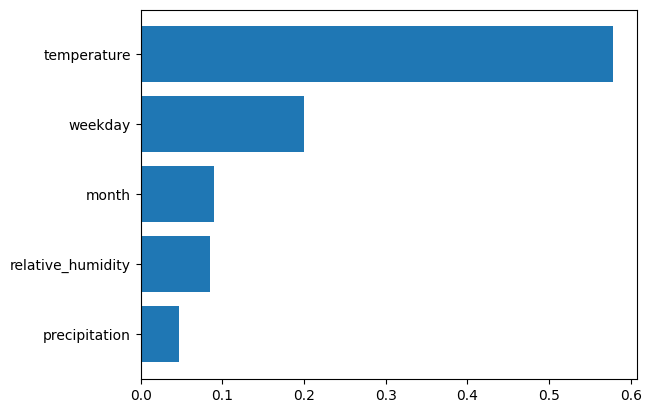

In [30]:
import matplotlib.pyplot as plt

fi = modelRFR.feature_importances_
s = np.argsort(fi)
plt.barh(range(len(s)),fi[s], align='center')
plt.yticks(range(len(s)), np.array(features)[s])
plt.show()

In [31]:
modelSVR = SVR()
modelSVR.fit(X_train, Y_train)
pred = modelSVR.predict(X_test)

svrMetrics = pd.DataFrame({'Model': 'Support Vector',
                          'r2score':r2_score(Y_test,pred),
                          'MSE': mean_squared_error(Y_test,pred),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,pred)),
                           'MSLE': mean_squared_log_error(Y_test,pred),
                          'RMSLE':np.sqrt(mean_squared_log_error(Y_test,pred))},index=[1])
svrMetrics

,Model,r2score,MSE,RMSE,MSLE,RMSLE
1,Support Vector,0.252795,69.143918,8.315282,0.01786,0.133642


In [32]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, Y_train)
pred = modelDTR.predict(X_test)

dtrMetrics = pd.DataFrame({'Model': 'Decision Tree Regressor',
                          'r2score':r2_score(Y_test,pred),
                          'MSE': mean_squared_error(Y_test,pred),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,pred)),
                           'MSLE': mean_squared_log_error(Y_test,pred),
                          'RMSLE':np.sqrt(mean_squared_log_error(Y_test,pred))},index=[2])
dtrMetrics

,Model,r2score,MSE,RMSE,MSLE,RMSLE
2,DecisionTreeRegressor,-0.127834,104.366013,10.215969,0.026761,0.163588


In [35]:
modelxgb = xgb.XGBRegressor()
modelxgb.fit(X_train, Y_train)
pred = modelxgb.predict(X_test)

xgbMetrics = pd.DataFrame({'Model': 'XGB Regressor',
                          'r2score':r2_score(Y_test,pred),
                          'MSE': mean_squared_error(Y_test,pred),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,pred)),
                           'MSLE': mean_squared_log_error(Y_test,pred),
                          'RMSLE':np.sqrt(mean_squared_log_error(Y_test,pred))},index=[3])
xgbMetrics

,Model,r2score,MSE,RMSE,MSLE,RMSLE
3,XGBRegressor,0.203997,73.659529,8.582513,0.01836,0.135499


In [ ]:
lg =LGBMRegressor(n_estimators=1500)
lg.fit(X_train,Y_train)
Y_pred_lg = lg.predict(X_test)
lgbmetrics = pd.DataFrame({'Model': 'LightGBM Regressor',
                           'r2score':r2_score(Y_test,Y_pred_lg),
                           'MSE': mean_squared_error(Y_test,Y_pred_lg),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,Y_pred_lg)),
                           'MSLE': mean_squared_log_error(Y_test,Y_pred_lg),
                           'RMSLE':np.sqrt(mean_squared_log_error(Y_test,Y_pred_lg))},index=[4])

lgbmetrics

In [37]:
lr =LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
lrmetrics = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(Y_test,Y_pred_lg),
                           'MSE': mean_squared_error(Y_test,Y_pred),
                           'RMSE': np.sqrt(mean_squared_error(Y_test,Y_pred)),
                           'MSLE': mean_squared_log_error(Y_test,Y_pred),
                           'RMSLE':np.sqrt(mean_squared_log_error(Y_test,Y_pred))},index=[5])

lrmetrics

,Model,r2score,MSE,RMSE,MSLE,RMSLE
5,Linear Regression,0.053786,69.592694,8.342224,0.017818,0.133485


In [38]:
frames = [rfrMetrics, svrMetrics, dtrMetrics, xgbMetrics, lgbmetrics, lrmetrics]
TrainingResult = pd.concat(frames)
TrainingResult.style.background_gradient(cmap='Blues')

,Model,r2score,MSE,RMSE,MSLE,RMSLE
0,RandomForestRegressor,0.389321,56.510258,7.517330,0.014597,0.120818
1,Support Vector,0.252795,69.143918,8.315282,0.017860,0.133642
2,DecisionTreeRegressor,-0.127834,104.366013,10.215969,0.026761,0.163588
3,XGBRegressor,0.203997,73.659529,8.582513,0.018360,0.135499
4,LightGBM Regressor,0.053786,87.559534,9.357325,0.021968,0.148217
5,Linear Regression,0.053786,69.592694,8.342224,0.017818,0.133485


In [45]:
import torch
import pandas as pd
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer

# Load your data
# df = pd.read_csv("your_data.csv")

# create the dataset from the pandas dataframe
max_encode_length = 36
max_prediction_length = 6
training_cutoff = df_Daily_Activity["date"].max() - max_prediction_length

training = TimeSeriesDataSet(
    df_Daily_Activity[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="courier_partners_online",
    group_ids=["group"],
    max_encode_length=max_encode_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["weekday", "month"],
    static_reals=["temperature", "relative_humidity", "precipitation"],
    time_varying_known_categoricals=[],
    time_varying_known_reals=["date"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["courier_partners_online"],
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time for each series
validation = TimeSeriesDataSet.from_dataset(training, df_Daily_Activity, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=100,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

# fit network
trainer.fit(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`